In [134]:
def getDatabaseConnection():
    import os
    import yaml
    from sqlalchemy import create_engine
    db_conn = os.path.join(os.getcwd(), "db_connections/db_connections.yml")
    with open(db_conn, 'r') as ymlfile:
        db_conns = yaml.load(ymlfile)
    redshift = db_conns['Redshift']
    # megavolt = db_conns['Megavolt']
    engine = 'postgresql://{username}:{password}@{host}:{port}/{database}'.format(username=redshift['username'],
                                                                                  password=redshift['password'],
                                                                                  host=redshift['host'],
                                                                                  port=redshift['port'],
                                                                                  database=redshift['database'])
    conn = create_engine(engine, connect_args={'sslmode': 'require'})
    return conn

In [135]:
# Sample only 100000 rows to try to avoid MemoryError
def queryDatabase(conn):
    df = pd.read_sql_query("select * from ee.david_invoices_weather_matched_7", con=conn)
    return df

In [136]:
import pandas as pd
df = queryDatabase(getDatabaseConnection())

In [137]:
df

,iethicalid,zip,invoicefromdt_timestamp,invoicetodt_timestamp,duration,kwh,wban_1,dist_1,wban_2,dist_2,...,kwh_updating_avg,daily_kwh_updating_avg,first_date,days_passed,month_avg_preceding,month_avg_preceding_flag,sgender_flag,sbillingaddress2_flag,countyfips_flag,srateclass_flag
0,3,15212,2013-07-25,2013-08-23,30,384.0,14762,14.855786,94823,17.099745,...,NaN,NaN,2013-07-25,29,NaN,0,1,0,1,1
1,3,15212,2013-08-24,2013-09-24,32,408.0,14762,14.855786,94823,17.099745,...,384.000000,12.80,2013-07-25,61,NaN,0,1,0,1,1
2,3,15212,2013-09-25,2013-10-23,29,348.0,14762,14.855786,94823,17.099745,...,396.000000,12.77,2013-07-25,90,NaN,0,1,0,1,1
3,3,15212,2013-10-24,2013-11-22,30,372.0,14762,14.855786,94823,17.099745,...,380.000000,12.51,2013-07-25,120,NaN,0,1,0,1,1
4,3,15212,2013-11-23,2013-12-24,32,552.0,14762,14.855786,94823,17.099745,...,378.000000,12.48,2013-07-25,152,NaN,0,1,0,1,1
5,3,15212,2013-12-25,2014-01-24,31,708.0,14762,14.855786,94823,17.099745,...,412.800000,13.44,2013-07-25,183,NaN,0,1,0,1,1
6,3,15212,2014-01-25,2014-02-24,31,684.0,14762,14.855786,94823,17.099745,...,462.000000,15.00,2013-07-25,214,NaN,0,1,0,1,1
7,3,15212,2014-02-25,2014-03-25,29,612.0,14762,14.855786,94823,17.099745,...,493.714286,16.01,2013-07-25,243,NaN,0,1,0,1,1
8,8,15236,2013-08-07,2013-09-05,30,156.0,14762,5.122639,94823,25.199487,...,NaN,NaN,2013-08-07,29,NaN,0,1,1,1,1
9,8,15236,2013-09-06,2013-10-04,29,156.0,14762,5.122639,94823,25.199487,...,156.000000,5.20,2013-08-07,58,NaN,0,1,1,1,1


In [163]:
df['iethicalid'].nunique()

162625

In [138]:
slice_3 = df[df['perc_missing_preferred'] <= 0.5].copy()

In [139]:
len(df), len(slice_3)/len(df)

(1940816, 0.9475292866505635)

In [140]:
slice_3.reset_index(inplace=True)

In [141]:
slice_3.drop('index', axis=1, inplace=True)

In [142]:
slice_4 = slice_3[slice_3['avg_kwh_day_over_invoice'] <= 100].copy()
#slice_5 = slice_4[slice_4['avg_kwh_day_over_invoice'] >= 8].copy()

In [143]:
import numpy as np
np.isnan(slice_4['tavg_interval_avg_preferred']).any()

False

In [144]:
len(slice_4)

1819642

In [145]:
slice_5 = slice_4[np.isfinite(slice_4['daily_kwh_lag'])]

In [146]:
slice_5.columns

Index(['iethicalid', 'zip', 'invoicefromdt_timestamp', 'invoicetodt_timestamp',
       'duration', 'kwh', 'wban_1', 'dist_1', 'wban_2', 'dist_2', 'upper',
       'sstate', 'szip', 'sgender', 'sbillingaddress2', 'iutilityid', 'stype',
       'countyfips', 'srateclass', 'tavg_interval_sum_1',
       'tavg_interval_avg_1', 'num_missing_1', 'tavg_interval_sum_2',
       'tavg_interval_avg_2', 'num_missing_2', 'tavg_interval_sum_corrected_1',
       'tavg_interval_sum_corrected_2', 'perc_missing_1', 'perc_missing_2',
       'wban_preferred', 'dist_preferred', 'tavg_interval_avg_preferred',
       'perc_missing_preferred', 'avg_kwh_day_over_invoice', 'todt_month',
       'todt_day', 'invoice_num', 'kwh_lag', 'kwh_lag_2', 'daily_kwh_lag',
       'daily_kwh_lag_2', 'kwh_updating_avg', 'daily_kwh_updating_avg',
       'first_date', 'days_passed', 'month_avg_preceding',
       'month_avg_preceding_flag', 'sgender_flag', 'sbillingaddress2_flag',
       'countyfips_flag', 'srateclass_flag'],
     

In [147]:
slice_5.head()

,iethicalid,zip,invoicefromdt_timestamp,invoicetodt_timestamp,duration,kwh,wban_1,dist_1,wban_2,dist_2,...,kwh_updating_avg,daily_kwh_updating_avg,first_date,days_passed,month_avg_preceding,month_avg_preceding_flag,sgender_flag,sbillingaddress2_flag,countyfips_flag,srateclass_flag
1,3,15212,2013-08-24,2013-09-24,32,408.0,14762,14.855786,94823,17.099745,...,384.0,12.80,2013-07-25,61,NaN,0,1,0,1,1
2,3,15212,2013-09-25,2013-10-23,29,348.0,14762,14.855786,94823,17.099745,...,396.0,12.77,2013-07-25,90,NaN,0,1,0,1,1
3,3,15212,2013-10-24,2013-11-22,30,372.0,14762,14.855786,94823,17.099745,...,380.0,12.51,2013-07-25,120,NaN,0,1,0,1,1
4,3,15212,2013-11-23,2013-12-24,32,552.0,14762,14.855786,94823,17.099745,...,378.0,12.48,2013-07-25,152,NaN,0,1,0,1,1
5,3,15212,2013-12-25,2014-01-24,31,708.0,14762,14.855786,94823,17.099745,...,412.8,13.44,2013-07-25,183,NaN,0,1,0,1,1


In [148]:
t = pd.pivot_table(data=slice_5.copy(), index='iethicalid', columns='todt_month', values='kwh')

In [149]:
t_filtered = t.dropna(axis=0)

In [150]:
t_filtered

todt_month,1,2,3,4,5,6,7,8,9,10,11,12
iethicalid,,,,,,,,,,,,
8,144.000000,144.000000,120.000000,120.000000,132.000000,168.000000,168.000000,144.000000,132.000000,138.000000,144.000000,108.000000
14,799.590000,806.720000,689.580000,567.080000,516.600000,564.240000,511.240000,608.440000,560.100000,443.610000,553.110000,659.100000
16,1200.000000,1032.000000,900.000000,684.000000,468.000000,528.000000,1164.000000,1092.000000,840.000000,512.000000,1044.000000,972.000000
19,327.034000,293.611000,213.308000,198.471000,148.101000,545.285000,870.968000,847.849000,754.029000,323.196500,260.833000,281.152000
26,258.000000,232.666667,215.750000,220.666667,205.333333,217.666667,219.333333,214.000000,215.750000,203.000000,232.000000,244.500000
27,1888.000000,2142.000000,1430.000000,852.000000,485.000000,457.000000,489.000000,374.000000,523.000000,429.500000,937.500000,1455.000000
39,824.500000,561.500000,549.666667,481.666667,392.333333,634.000000,1064.000000,1222.500000,1175.666667,603.500000,438.000000,576.250000
41,822.333333,722.000000,689.000000,584.000000,813.000000,987.000000,809.000000,1313.000000,1124.750000,730.666667,802.000000,960.333333
47,1158.000000,934.000000,850.000000,922.000000,736.000000,629.000000,788.000000,885.000000,1039.000000,791.000000,973.000000,954.000000


In [151]:
p = t_filtered.apply(lambda x: x/t_filtered.sum(1))

In [152]:
p

todt_month,1,2,3,4,5,6,7,8,9,10,11,12
iethicalid,,,,,,,,,,,,
8,0.086643,0.086643,0.072202,0.072202,0.079422,0.101083,0.101083,0.086643,0.079422,0.083032,0.086643,0.064982
14,0.109843,0.110822,0.094730,0.077902,0.070967,0.077512,0.070231,0.083584,0.076943,0.060940,0.075983,0.090543
16,0.114987,0.098888,0.086240,0.065542,0.044845,0.050594,0.111537,0.104638,0.080491,0.049061,0.100038,0.093139
19,0.064582,0.057982,0.042124,0.039194,0.029247,0.107682,0.171998,0.167432,0.148905,0.063824,0.051509,0.055522
26,0.096317,0.086859,0.080544,0.082379,0.076655,0.081259,0.081882,0.079890,0.080544,0.075784,0.086610,0.091277
27,0.164718,0.186878,0.124760,0.074333,0.042314,0.039871,0.042663,0.032630,0.045629,0.037472,0.081792,0.126941
39,0.096732,0.065876,0.064488,0.056510,0.046029,0.074382,0.124830,0.143426,0.137931,0.070804,0.051387,0.067607
41,0.079398,0.069711,0.066525,0.056387,0.078497,0.095297,0.078111,0.126773,0.108597,0.070548,0.077435,0.092722
47,0.108641,0.087625,0.079745,0.086500,0.069050,0.059011,0.073928,0.083028,0.097476,0.074210,0.091284,0.089502


In [153]:
pct_cols = [str(col) + '_pct' for col in p.columns]
p.columns = pct_cols
p.head()

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct,11_pct,12_pct
iethicalid,,,,,,,,,,,,
8,0.086643,0.086643,0.072202,0.072202,0.079422,0.101083,0.101083,0.086643,0.079422,0.083032,0.086643,0.064982
14,0.109843,0.110822,0.094730,0.077902,0.070967,0.077512,0.070231,0.083584,0.076943,0.060940,0.075983,0.090543
16,0.114987,0.098888,0.086240,0.065542,0.044845,0.050594,0.111537,0.104638,0.080491,0.049061,0.100038,0.093139
19,0.064582,0.057982,0.042124,0.039194,0.029247,0.107682,0.171998,0.167432,0.148905,0.063824,0.051509,0.055522
26,0.096317,0.086859,0.080544,0.082379,0.076655,0.081259,0.081882,0.079890,0.080544,0.075784,0.086610,0.091277


In [154]:
def get_pct_centroids(tt):
    tt = pd.DataFrame(tt)
    tt['count'] = 1
    out = tt.groupby(0).count()
    out['pct'] = out/out.sum()
    return out

In [155]:
months = range(1, 13)

In [156]:
p_nm = p.dropna().copy()

In [157]:
p_nm.shape

(49591, 12)

C:\Users\Spare Computer\Anaconda3\lib\site-packages\ipykernel\__main__.py:33: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


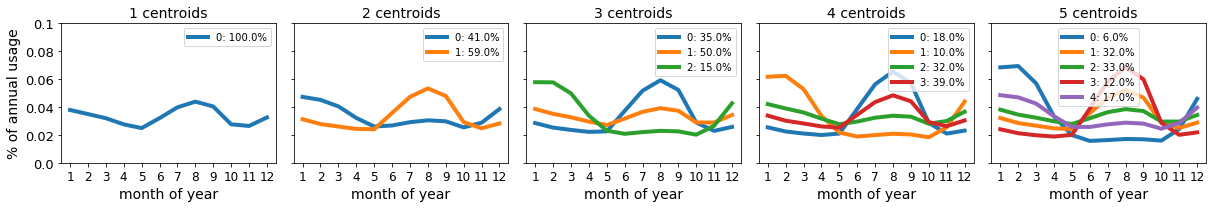

In [158]:
# try kmeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

n_c = 5

fontsize=14
fig, axarr = plt.subplots(1, n_c, figsize=(17, 3))

s = []
for c in range(1, n_c + 1):
    k = c - 1
    km = KMeans(n_clusters=c, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                tol=0.0001, 
                verbose=0)
    tt = km.fit_predict(X=p_nm.sample(frac=1.0))
    s = s + [km.score(p_nm)]
    centroids = pd.DataFrame(km.cluster_centers_)
    
    shares = get_pct_centroids(tt)
    
    axarr[k].plot(range(1, 13), centroids.transpose(), lw=4)
    axarr[k].set_title('{} centroids'.format(c), fontsize=fontsize)
    
    axarr[k].set_ylim([0, 0.25])
    axarr[k].set_yticklabels([], fontsize=fontsize - 2)
    axarr[k].set_xlim([0.5, 12.5])
    axarr[k].set_xticks(range(1, 13))
    axarr[k].set_xticklabels(months, fontsize=fontsize - 2)
    legend = ['{}: {}%'.format(i, np.round(shares.ix[i, 'pct']*100, 0)) for i in range(0, c)]
    axarr[k].legend(legend)
    
    if k == 0:
        axarr[k].set_yticklabels(np.linspace(0, 18, 10)/100, fontsize=fontsize - 1)
        axarr[k].set_ylabel('% of annual usage', fontsize=fontsize)
    axarr[k].set_xlabel('month of year', fontsize=fontsize)
    
plt.tight_layout()

plt.show()

In [159]:
km = KMeans(n_clusters=4, 
            init='k-means++', 
            n_init=10, 
            max_iter=300, 
            tol=0.0001, 
            verbose=0)
tt = km.fit_predict(X=p_nm.sample(frac=1.0))
s = s + [km.score(p_nm)]
centroids = pd.DataFrame(km.cluster_centers_)
    
shares = get_pct_centroids(tt)

C:\Users\Spare Computer\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


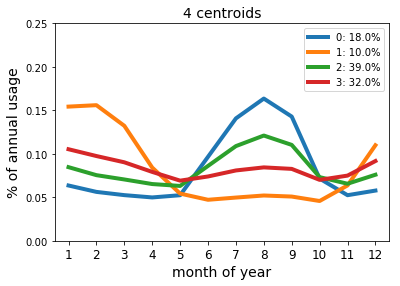

In [160]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(range(1, 13), centroids.transpose(), lw=4)
ax.set_title('{} centroids'.format(4), fontsize=fontsize)
    
ax.set_ylim([0, 0.25])
ax.set_xlim([0.5, 12.5])
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months, fontsize=fontsize - 2)
legend = ['{}: {}%'.format(i, np.round(shares.ix[i, 'pct']*100, 0)) for i in range(0, 4)]
ax.legend(legend)

ax.set_ylabel('% of annual usage', fontsize=fontsize)
ax.set_xlabel('month of year', fontsize=fontsize)

plt.show()

In [161]:
centroids

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.063582,0.056233,0.052508,0.049856,0.052414,0.096610,0.140743,0.163537,0.142829,0.071517,0.052434,0.057738
1,0.154286,0.155935,0.132198,0.084178,0.054279,0.047163,0.049714,0.052091,0.050874,0.045758,0.063666,0.109858
2,0.084674,0.075467,0.070520,0.065252,0.063076,0.086100,0.108883,0.121019,0.110259,0.073200,0.065597,0.075954
3,0.105273,0.097456,0.090253,0.079205,0.069161,0.073966,0.080883,0.084408,0.082680,0.070058,0.074959,0.091698


In [162]:
shares

,count,pct
0,,
0,8952,0.180517
1,5106,0.102962
2,19461,0.392430
3,16072,0.324091


In [165]:
p_nm

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct,11_pct,12_pct
iethicalid,,,,,,,,,,,,
8,0.086643,0.086643,0.072202,0.072202,0.079422,0.101083,0.101083,0.086643,0.079422,0.083032,0.086643,0.064982
14,0.109843,0.110822,0.094730,0.077902,0.070967,0.077512,0.070231,0.083584,0.076943,0.060940,0.075983,0.090543
16,0.114987,0.098888,0.086240,0.065542,0.044845,0.050594,0.111537,0.104638,0.080491,0.049061,0.100038,0.093139
19,0.064582,0.057982,0.042124,0.039194,0.029247,0.107682,0.171998,0.167432,0.148905,0.063824,0.051509,0.055522
26,0.096317,0.086859,0.080544,0.082379,0.076655,0.081259,0.081882,0.079890,0.080544,0.075784,0.086610,0.091277
27,0.164718,0.186878,0.124760,0.074333,0.042314,0.039871,0.042663,0.032630,0.045629,0.037472,0.081792,0.126941
39,0.096732,0.065876,0.064488,0.056510,0.046029,0.074382,0.124830,0.143426,0.137931,0.070804,0.051387,0.067607
41,0.079398,0.069711,0.066525,0.056387,0.078497,0.095297,0.078111,0.126773,0.108597,0.070548,0.077435,0.092722
47,0.108641,0.087625,0.079745,0.086500,0.069050,0.059011,0.073928,0.083028,0.097476,0.074210,0.091284,0.089502


In [186]:
def _get_nearest_cluster(df, clusters, pct_cols):
    """ Return the nearest cluster centroid for each account using euclidean distance. """
    for cluster in clusters.index:
        cluster_centroids = clusters.loc[cluster].as_matrix()
        df['{}'.format(cluster)] = _get_cluster_distance(df=df,
                                                                pct_cols=pct_cols,
                                                                cluster_centroids=cluster_centroids)

    # assign cluster with the minimum distance
    df['LOAD_CURVE_KMEANS'] = df[['{}'.format(cluster) for cluster in clusters.index]].idxmin(1)

    return df

In [187]:
def _get_cluster_distance(df, pct_cols, cluster_centroids):
    """ Get Euclidean distance of each customer's load curve to a single centroid """
    d = df[pct_cols].as_matrix() - cluster_centroids
    d_sq = np.power(d, 2)
    d_sq_sum = np.nansum(d_sq, 1)  # note nansum treats missing values as zeros - we want to assign centroids even when some months are missing data
    distance = np.sqrt(d_sq_sum)
    return distance

In [188]:
nearest_clusters_df = _get_nearest_cluster(p_nm, centroids, pct_cols)

In [189]:
nearest_clusters_df

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct,11_pct,12_pct,0,1,2,3,LOAD_CURVE_KMEANS
iethicalid,,,,,,,,,,,,,,,,,
8,0.086643,0.086643,0.072202,0.072202,0.079422,0.101083,0.101083,0.086643,0.079422,0.083032,0.086643,0.064982,0.126311,0.158866,0.059372,0.055873,3
14,0.109843,0.110822,0.094730,0.077902,0.070967,0.077512,0.070231,0.083584,0.076943,0.060940,0.075983,0.090543,0.160768,0.097472,0.085100,0.021672,3
16,0.114987,0.098888,0.086240,0.065542,0.044845,0.050594,0.111537,0.104638,0.080491,0.049061,0.100038,0.093139,0.142311,0.128190,0.080830,0.062147,3
19,0.064582,0.057982,0.042124,0.039194,0.029247,0.107682,0.171998,0.167432,0.148905,0.063824,0.051509,0.055522,0.044484,0.270853,0.110181,0.177029,0
26,0.096317,0.086859,0.080544,0.082379,0.076655,0.081259,0.081882,0.079890,0.080544,0.075784,0.086610,0.091277,0.146043,0.130106,0.069668,0.024513,3
27,0.164718,0.186878,0.124760,0.074333,0.042314,0.039871,0.042663,0.032630,0.045629,0.037472,0.081792,0.126941,0.281872,0.050596,0.211957,0.149976,1
39,0.096732,0.065876,0.064488,0.056510,0.046029,0.074382,0.124830,0.143426,0.137931,0.070804,0.051387,0.067607,0.051915,0.204228,0.050770,0.111302,2
41,0.079398,0.069711,0.066525,0.056387,0.078497,0.095297,0.078111,0.126773,0.108597,0.070548,0.077435,0.092722,0.098229,0.178452,0.043463,0.074477,2
47,0.108641,0.087625,0.079745,0.086500,0.069050,0.059011,0.073928,0.083028,0.097476,0.074210,0.091284,0.089502,0.149395,0.124767,0.075506,0.032450,3


In [203]:
for i in range(0, 4):
    print(len(nearest_clusters_df[nearest_clusters_df['LOAD_CURVE_KMEANS']==str(i)]))

8952
5106
19461
16072


In [204]:
8952 / 49591

0.1805166260006856

In [205]:
slice_5.head()

,iethicalid,zip,invoicefromdt_timestamp,invoicetodt_timestamp,duration,kwh,wban_1,dist_1,wban_2,dist_2,...,kwh_updating_avg,daily_kwh_updating_avg,first_date,days_passed,month_avg_preceding,month_avg_preceding_flag,sgender_flag,sbillingaddress2_flag,countyfips_flag,srateclass_flag
1,3,15212,2013-08-24,2013-09-24,32,408.0,14762,14.855786,94823,17.099745,...,384.0,12.80,2013-07-25,61,NaN,0,1,0,1,1
2,3,15212,2013-09-25,2013-10-23,29,348.0,14762,14.855786,94823,17.099745,...,396.0,12.77,2013-07-25,90,NaN,0,1,0,1,1
3,3,15212,2013-10-24,2013-11-22,30,372.0,14762,14.855786,94823,17.099745,...,380.0,12.51,2013-07-25,120,NaN,0,1,0,1,1
4,3,15212,2013-11-23,2013-12-24,32,552.0,14762,14.855786,94823,17.099745,...,378.0,12.48,2013-07-25,152,NaN,0,1,0,1,1
5,3,15212,2013-12-25,2014-01-24,31,708.0,14762,14.855786,94823,17.099745,...,412.8,13.44,2013-07-25,183,NaN,0,1,0,1,1


In [209]:
load_curves = nearest_clusters_df.filter(['iethicalid', 'LOAD_CURVE_KMEANS']).copy()

In [216]:
load_curves.reset_index(inplace=True)

In [217]:
load_curves

,iethicalid,LOAD_CURVE_KMEANS
0,8,3
1,14,3
2,16,3
3,19,0
4,26,3
5,27,1
6,39,2
7,41,2
8,47,3
9,48,2


In [221]:
slice_6 = slice_5.merge(load_curves, how='left', left_on='iethicalid', right_on='iethicalid')

In [222]:
slice_6.fillna(-1, inplace=True)

In [225]:
slice_6

,iethicalid,zip,invoicefromdt_timestamp,invoicetodt_timestamp,duration,kwh,wban_1,dist_1,wban_2,dist_2,...,daily_kwh_updating_avg,first_date,days_passed,month_avg_preceding,month_avg_preceding_flag,sgender_flag,sbillingaddress2_flag,countyfips_flag,srateclass_flag,LOAD_CURVE_KMEANS
0,3,15212,2013-08-24,2013-09-24,32,408.0,14762,14.855786,94823,17.099745,...,12.80,2013-07-25,61,-1.00,0,1,0,1,1,-1
1,3,15212,2013-09-25,2013-10-23,29,348.0,14762,14.855786,94823,17.099745,...,12.77,2013-07-25,90,-1.00,0,1,0,1,1,-1
2,3,15212,2013-10-24,2013-11-22,30,372.0,14762,14.855786,94823,17.099745,...,12.51,2013-07-25,120,-1.00,0,1,0,1,1,-1
3,3,15212,2013-11-23,2013-12-24,32,552.0,14762,14.855786,94823,17.099745,...,12.48,2013-07-25,152,-1.00,0,1,0,1,1,-1
4,3,15212,2013-12-25,2014-01-24,31,708.0,14762,14.855786,94823,17.099745,...,13.44,2013-07-25,183,-1.00,0,1,0,1,1,-1
5,3,15212,2014-01-25,2014-02-24,31,684.0,14762,14.855786,94823,17.099745,...,15.00,2013-07-25,214,-1.00,0,1,0,1,1,-1
6,3,15212,2014-02-25,2014-03-25,29,612.0,14762,14.855786,94823,17.099745,...,16.01,2013-07-25,243,-1.00,0,1,0,1,1,-1
7,8,15236,2013-09-06,2013-10-04,29,156.0,14762,5.122639,94823,25.199487,...,5.20,2013-08-07,58,-1.00,0,1,1,1,1,3
8,8,15236,2013-10-05,2013-11-05,32,144.0,14762,5.122639,94823,25.199487,...,5.28,2013-08-07,90,-1.00,0,1,1,1,1,3
9,8,15236,2013-11-06,2013-12-05,30,108.0,14762,5.122639,94823,25.199487,...,5.02,2013-08-07,120,-1.00,0,1,1,1,1,3
